## Importing required libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Reading the data in

In [10]:
df = pd.read_csv("china_gdp.csv")
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


## Plotting the Dataset

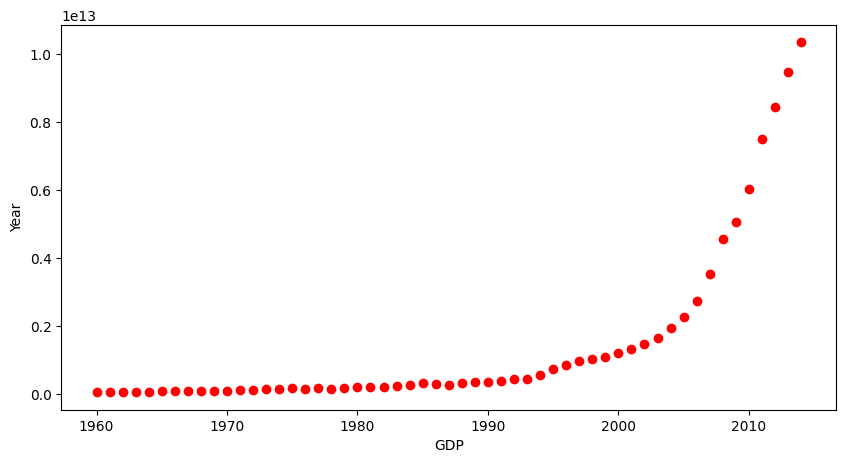

In [4]:
plt.figure(figsize=(10,5))
x_data , y_data = (df["Year"].values,df["Value"].values)
plt.plot(x_data , y_data , 'ro')
plt.xlabel("GDP")
plt.ylabel("Year")
plt.show()

## Choosing a model

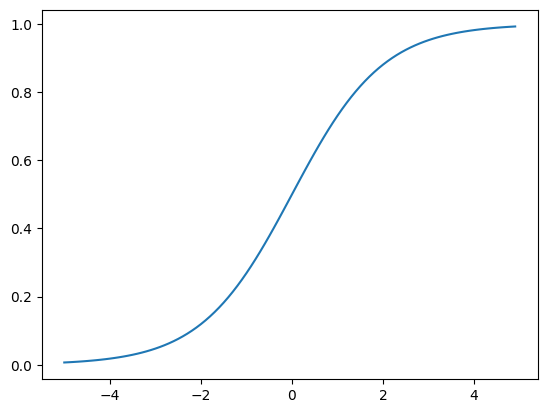

In [5]:
X = np.arange(-5.0 , 5.0 , 0.1)
Y = 1.0 / (1.0 + np.exp(-X))
plt.plot(X , Y)

## building the model

In [6]:
def sigmoid(x, Beta_1 , Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 *(x-Beta_2)))
    return y

In [7]:
xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

In [8]:
from scipy.optimize import curve_fit
popt , pcov = curve_fit(sigmoid, xdata , ydata)
print (" beta_1 = %f , beta_2 = %f" % (popt[0] ,popt[1]))

 beta_1 = 690.451711 , beta_2 = 0.997207


## Plot

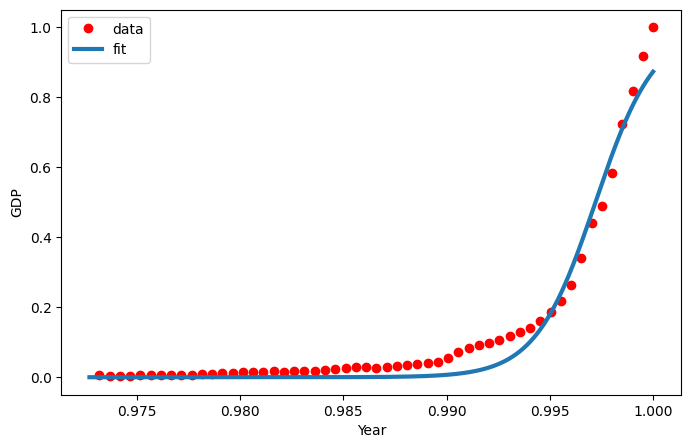

In [9]:
x = np.linspace(1960, 2015 , 2000)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata , 'ro' , label='data')
plt.plot(x,y, linewidth=3.0 , label = 'fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()